In [1]:
#loading the necessary python libraries
import numpy as np
import pandas as pd

import seaborn as sns
sns.set(font_scale = 1.5)

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('fivethirtyeight')

In [2]:
#loading the dataset into a pandas dataframe
amazon_books = pd.read_csv('../data-sources/amazon-bestsellers/amazon-bestsellers.csv')
amazon_books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [3]:
amazon_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [4]:
amazon_books.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,550,351,Publication Manual of the American Psychologic...,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Author,550,248,Jeff Kinney,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
User Rating,550,NaN,NaN,NaN,4.61836,0.22698,3.3,4.5,4.7,4.8,4.9
Reviews,550,NaN,NaN,NaN,11953.3,11731.1,37,4058,8580,17253.2,87841
Price,550,NaN,NaN,NaN,13.1,10.8423,0,7,11,16,105
Year,550,NaN,NaN,NaN,2014,3.16516,2009,2011,2014,2017,2019
Genre,550,2,Non Fiction,310,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
amazon_books['Genre'].value_counts(normalize=True)

Non Fiction    0.563636
Fiction        0.436364
Name: Genre, dtype: float64

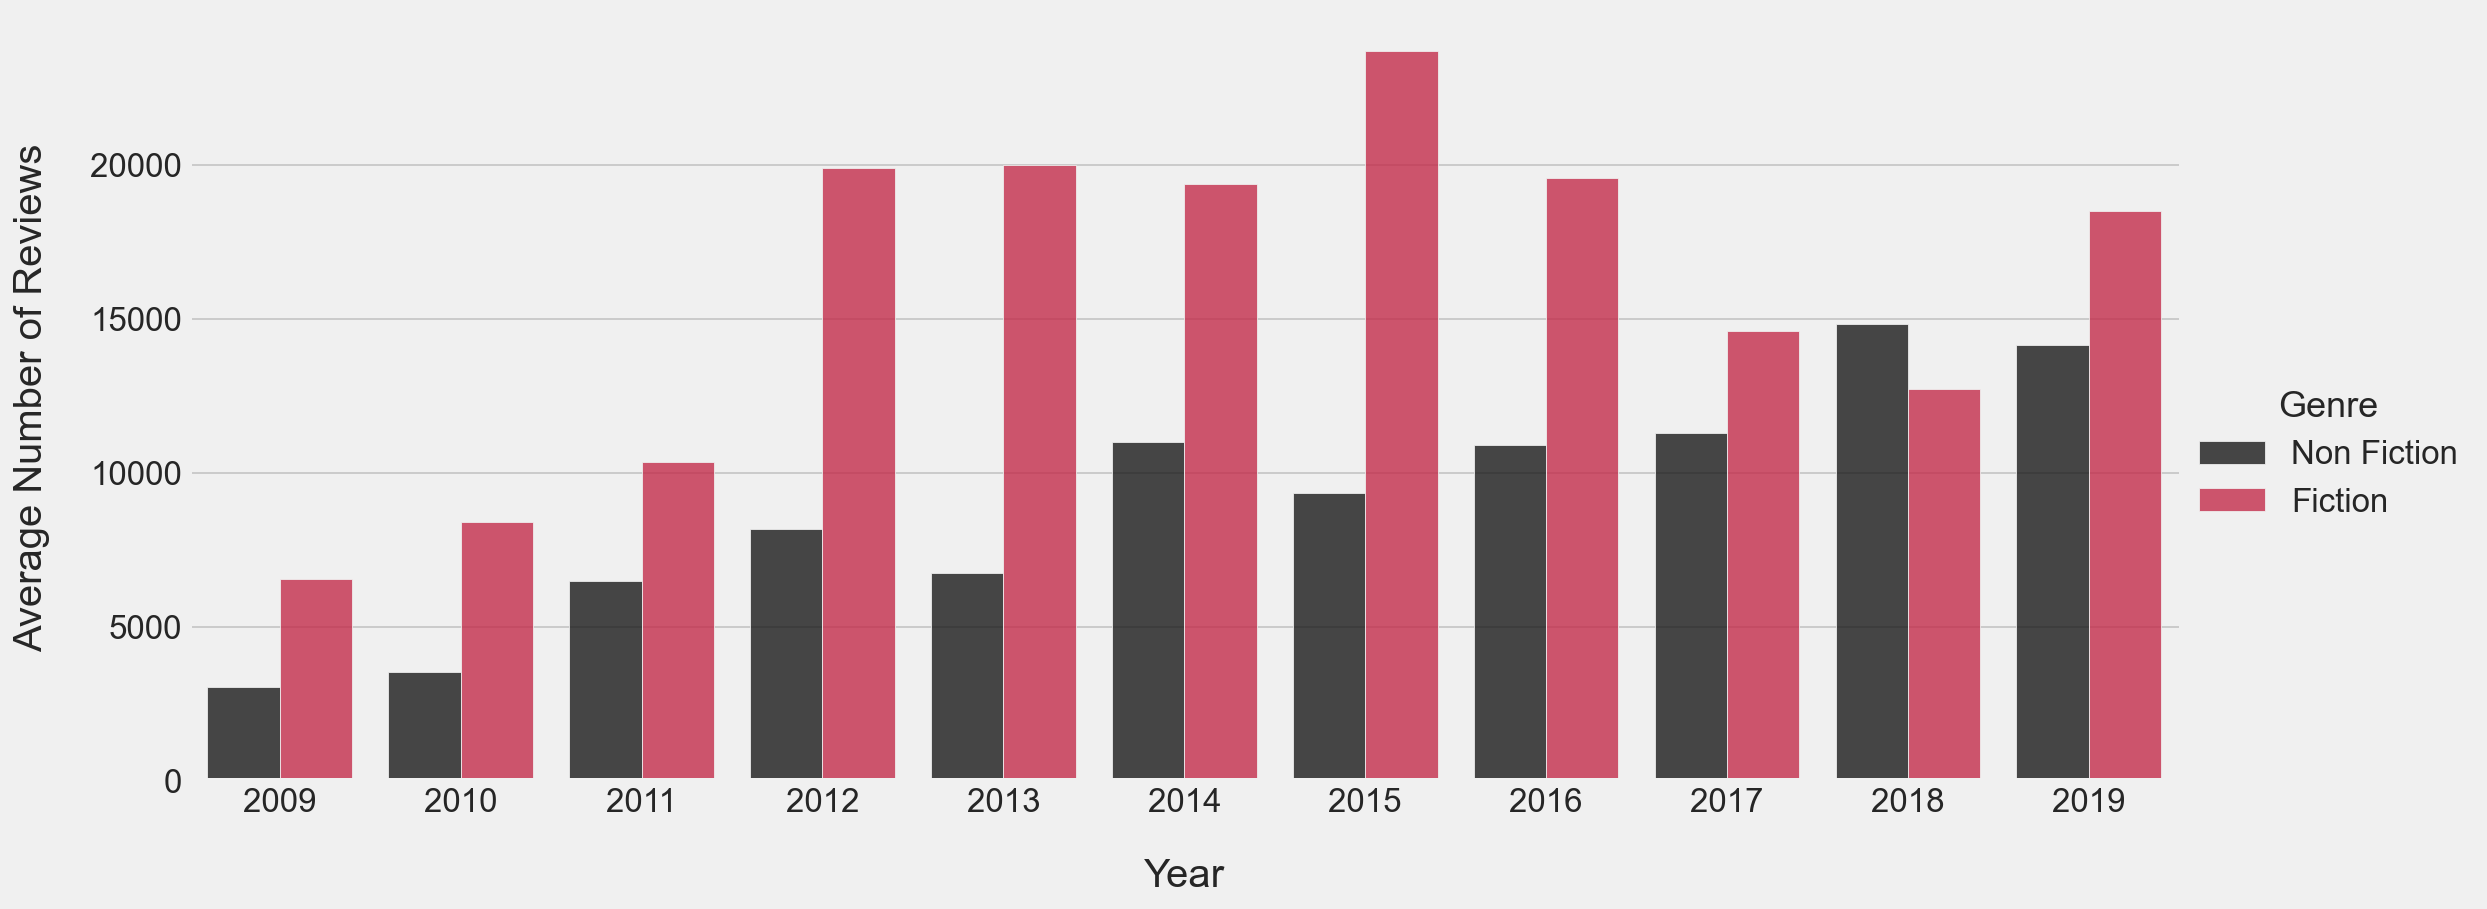

In [6]:
sns.catplot(data=amazon_books, x='Year', y='Reviews', hue='Genre',
            kind='bar', alpha=0.8, height=6, aspect=15/6, ci=None,
            palette=['k', 'crimson'])
plt.xlabel('Year', fontsize=20, labelpad=20)
plt.ylabel('Average Number of Reviews', fontsize=20, labelpad=20)
plt.show()

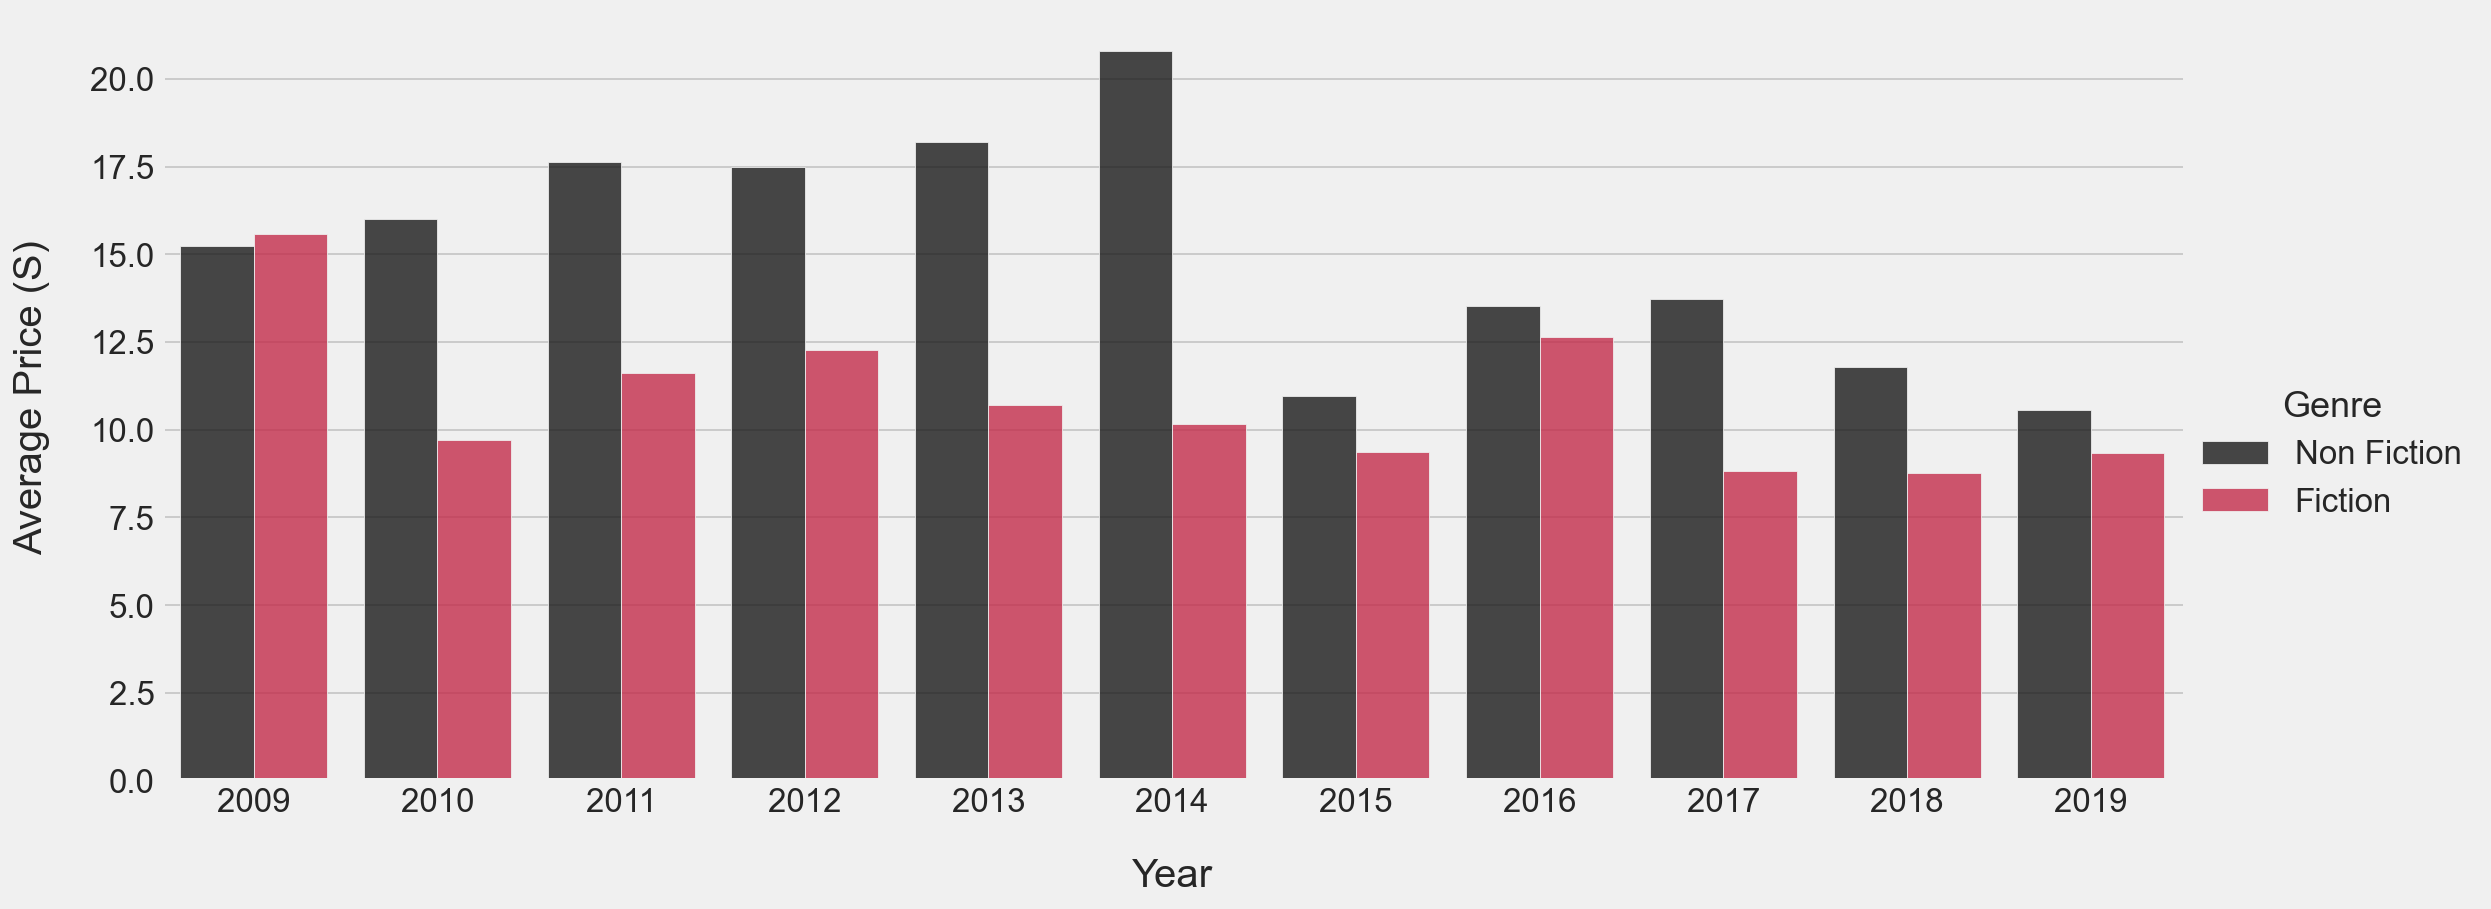

In [7]:
sns.catplot(data=amazon_books, x='Year', y='Price', hue='Genre',
            kind='bar', alpha=0.8, height=6, aspect=15/6, ci=None,
            palette=['k', 'crimson'])
plt.xlabel('Year', fontsize=20, labelpad=20)
plt.ylabel('Average Price (S)', fontsize=20, labelpad=20)
plt.show()

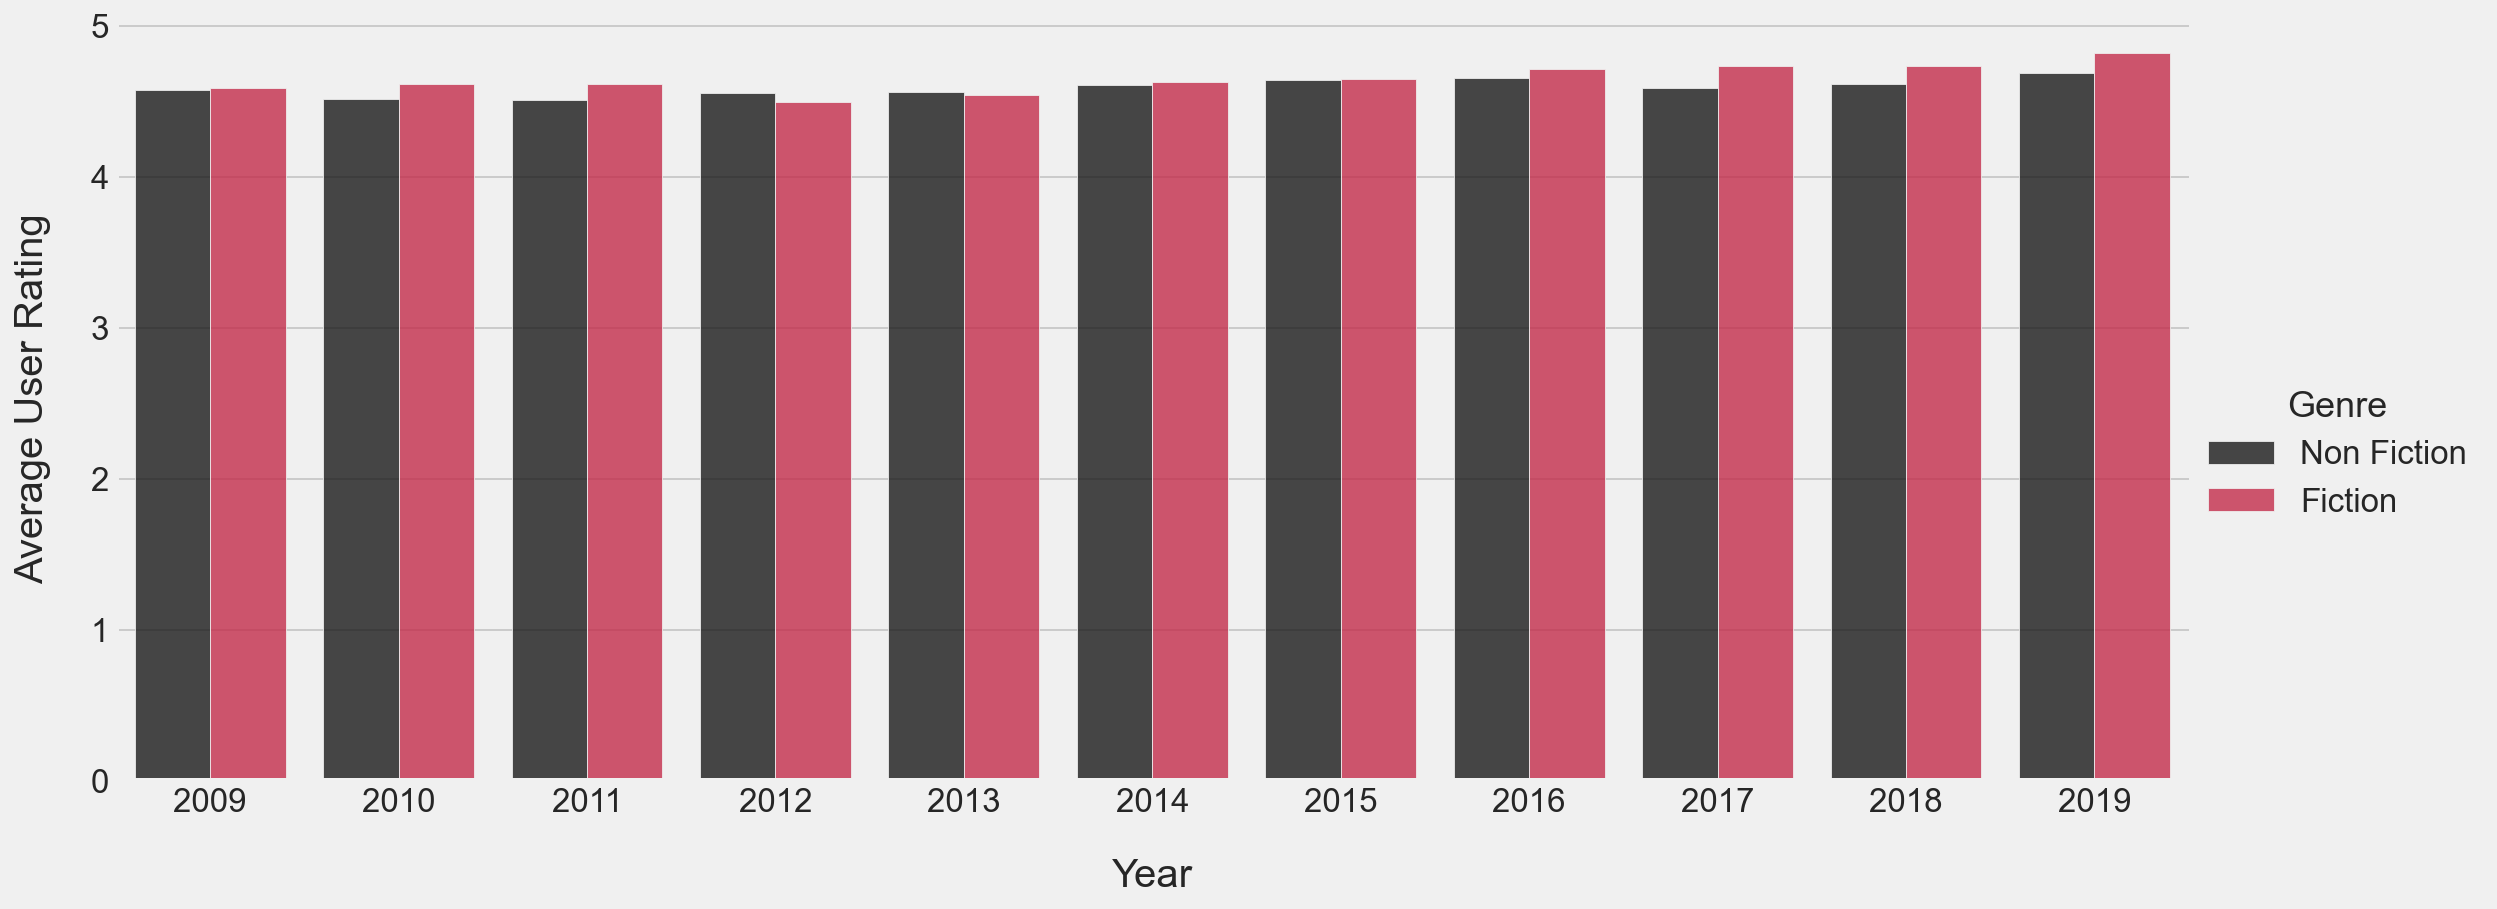

In [8]:
sns.catplot(data=amazon_books, x='Year', y='User Rating', hue='Genre',
            kind='bar', alpha=0.8, height=6, aspect=15/6, ci=None,
            palette=['k', 'crimson'])
plt.xlabel('Year', fontsize=20, labelpad=20)
plt.ylabel('Average User Rating', fontsize=20, labelpad=20)
plt.show()

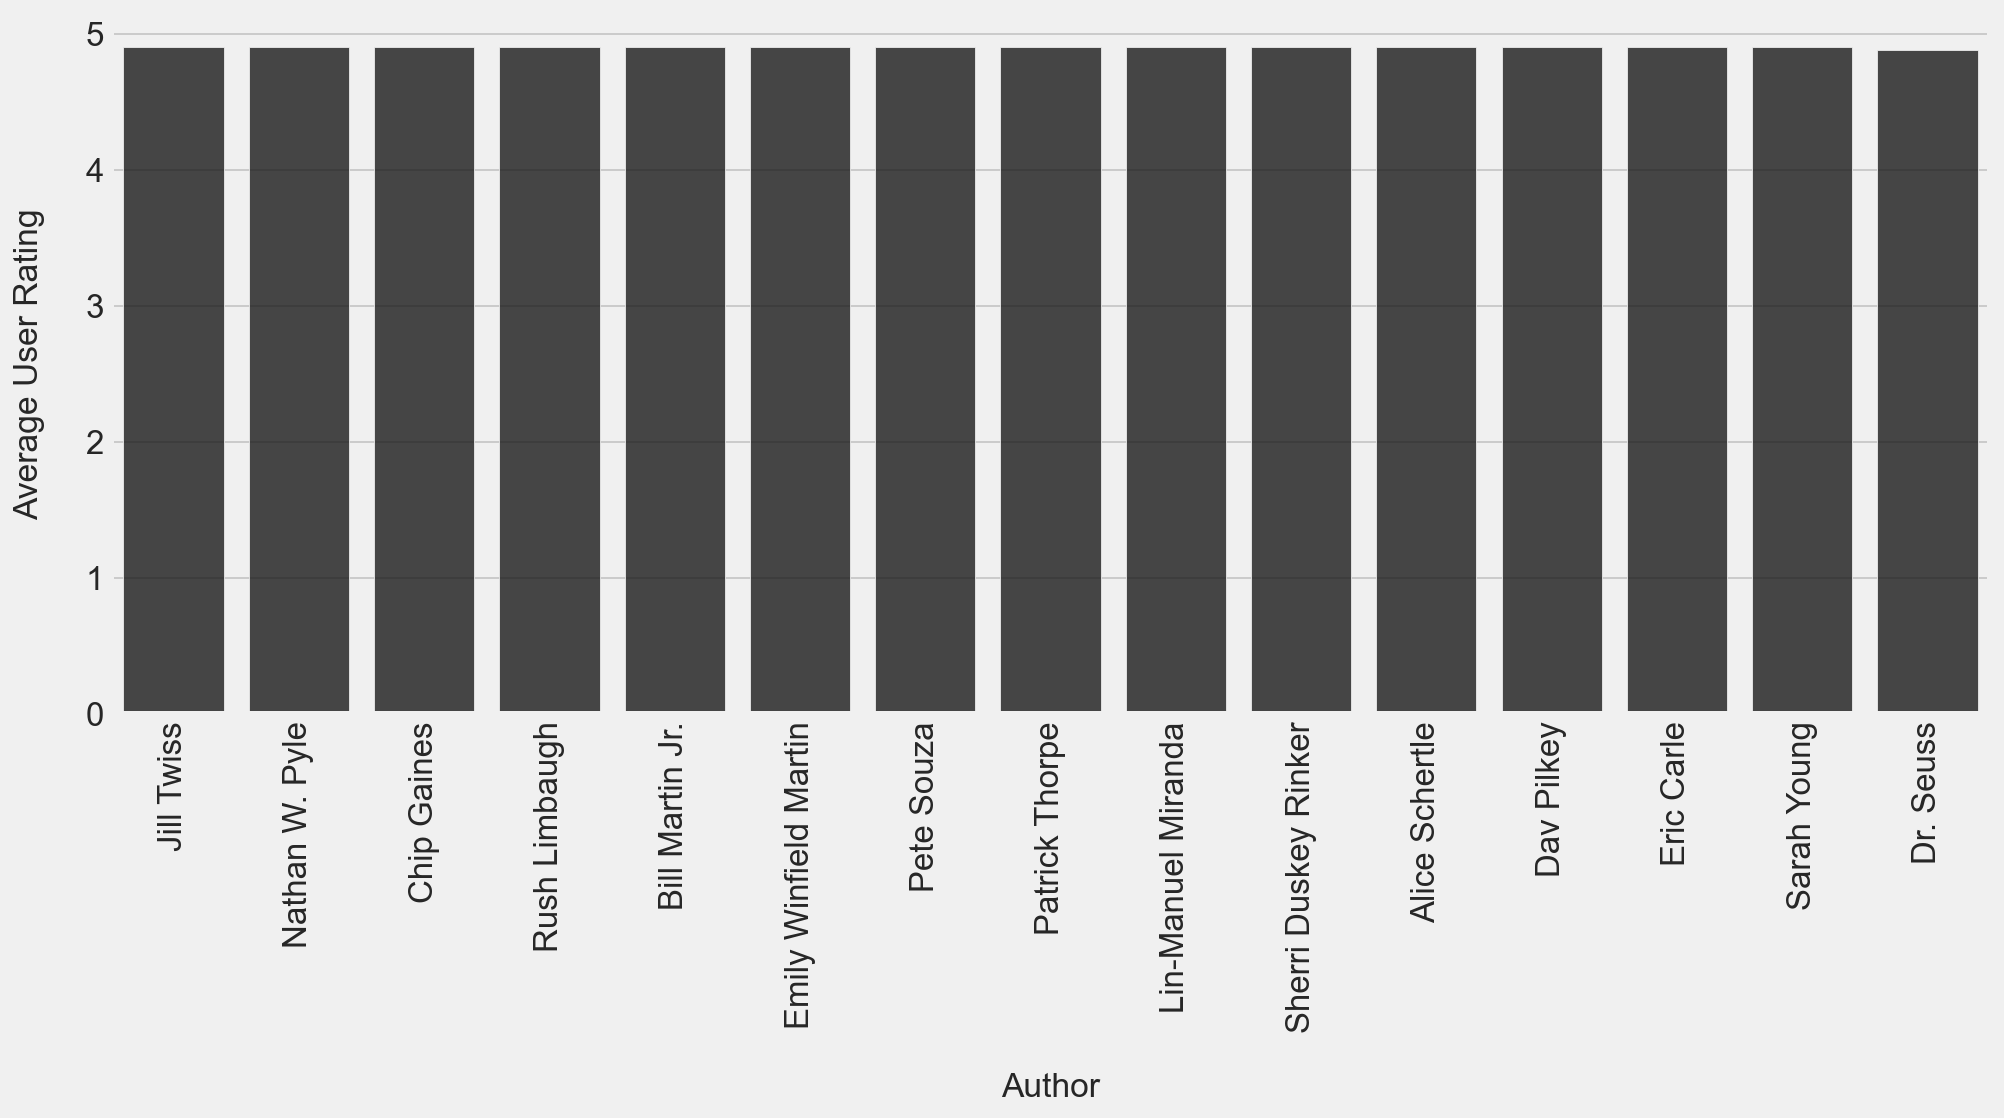

In [9]:
highest_rated_authors = amazon_books.groupby('Author', as_index=False)[['User Rating']].mean()\
                        .sort_values('User Rating', ascending=False).head(15)

fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=highest_rated_authors, x='Author', y='User Rating',
            alpha=0.8, color='k', ax=ax)
ax.set_xlabel('Author', labelpad=20)
ax.set_ylabel('Average User Rating', labelpad=20)
plt.xticks(rotation=90)
plt.show()

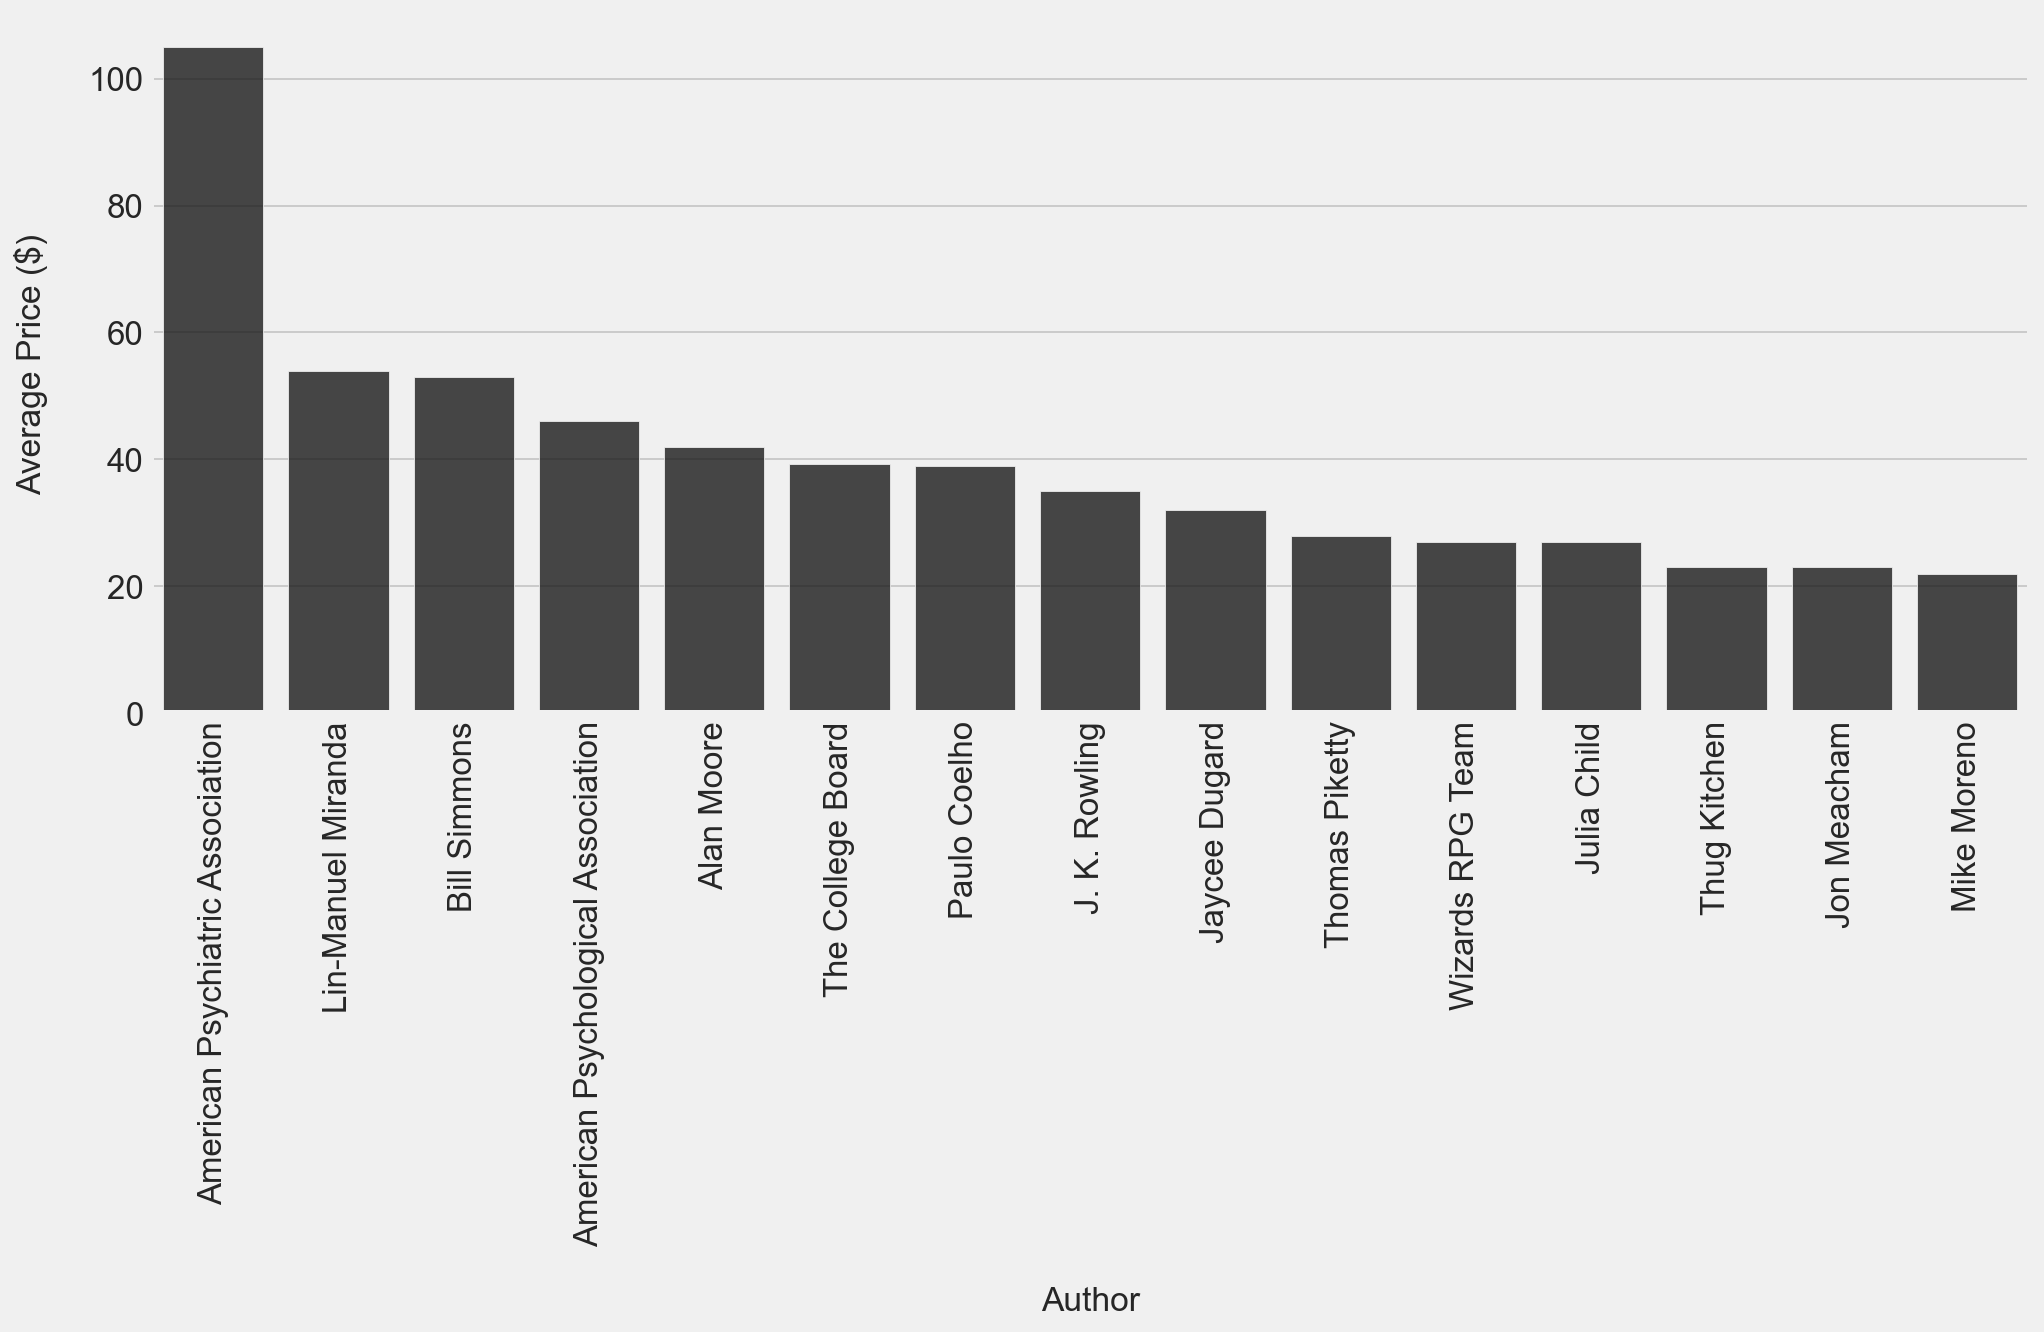

In [10]:
most_expensive_authors = amazon_books.groupby('Author', as_index=False)[['Price']].mean()\
                            .sort_values('Price', ascending=False).head(15)

fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=most_expensive_authors, x='Author', y='Price',
            alpha=0.8, color='k', ax=ax)
ax.set_xlabel('Author', labelpad=20)
ax.set_ylabel('Average Price ($)', labelpad=20)
plt.xticks(rotation=90)
plt.show()

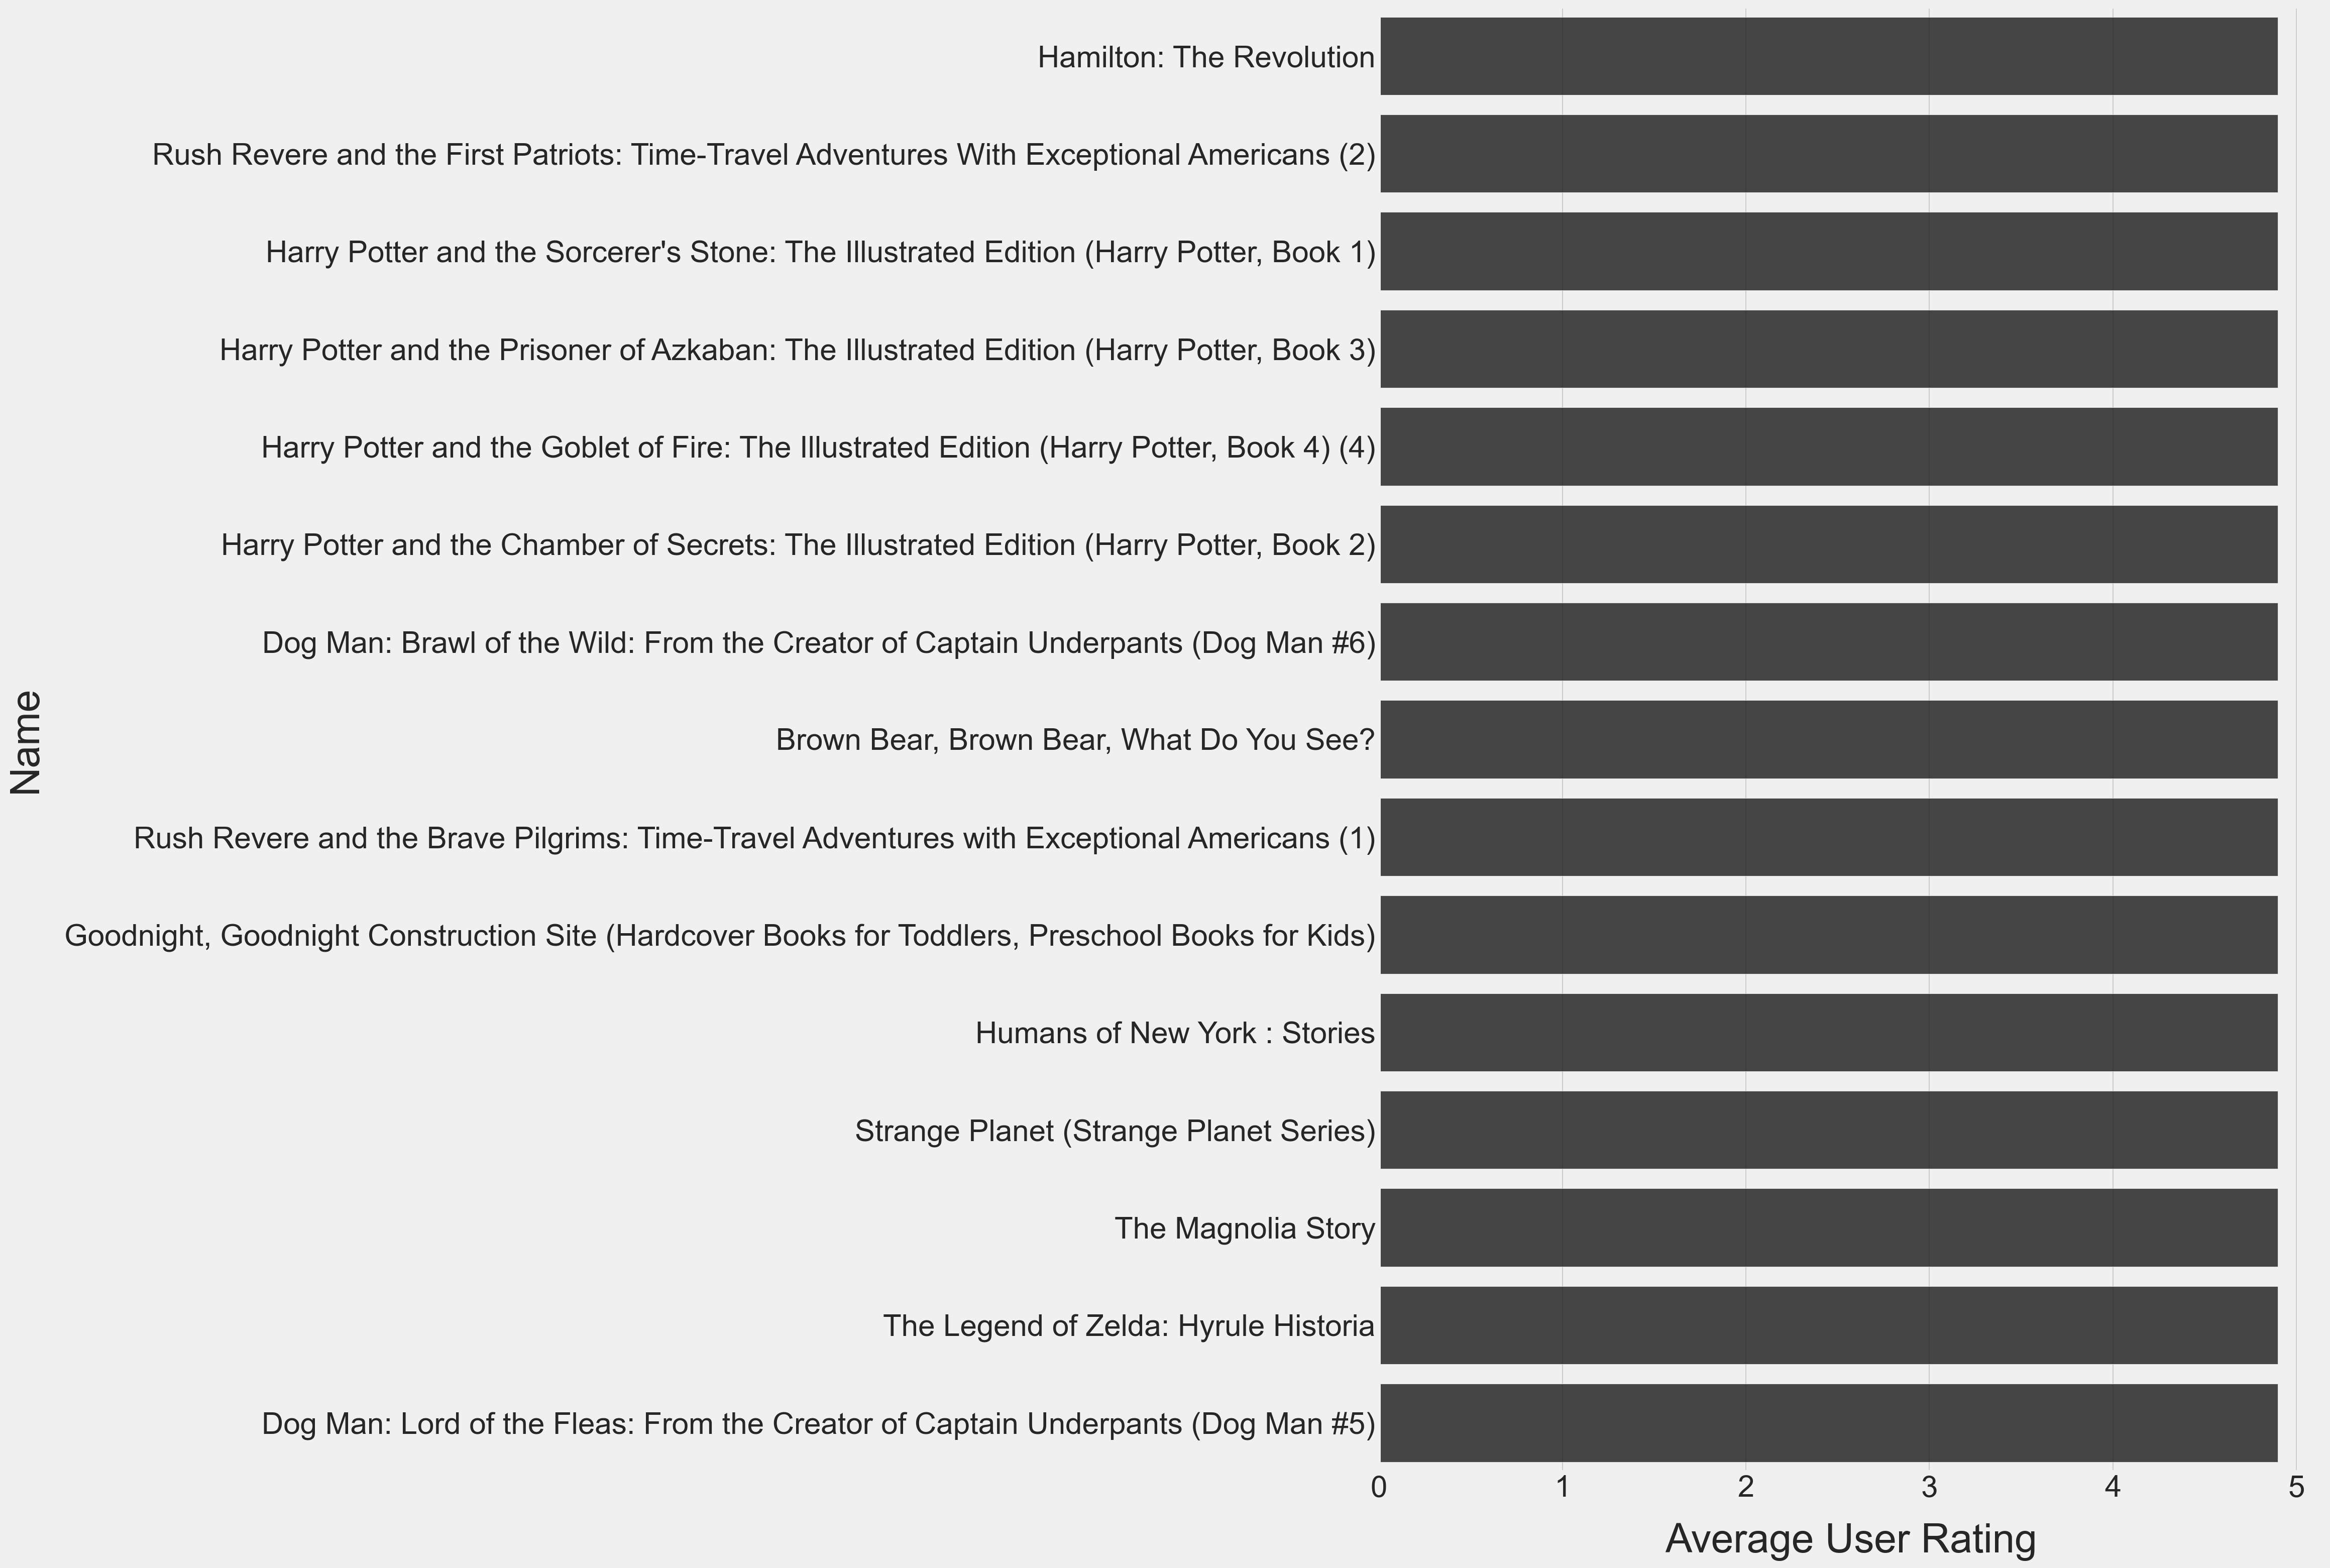

In [11]:
highest_rated_titles = amazon_books.groupby('Name', as_index=False)[['User Rating']].mean()\
                        .sort_values('User Rating', ascending=False).head(15)

fig, ax = plt.subplots(figsize=(15, 25))
sns.barplot(data=highest_rated_titles, y='Name', x='User Rating',
            alpha=0.8, color='k', ax=ax)
ax.set_ylabel('Name', fontsize=40, labelpad=20)
ax.set_xlabel('Average User Rating', fontsize=40, labelpad=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

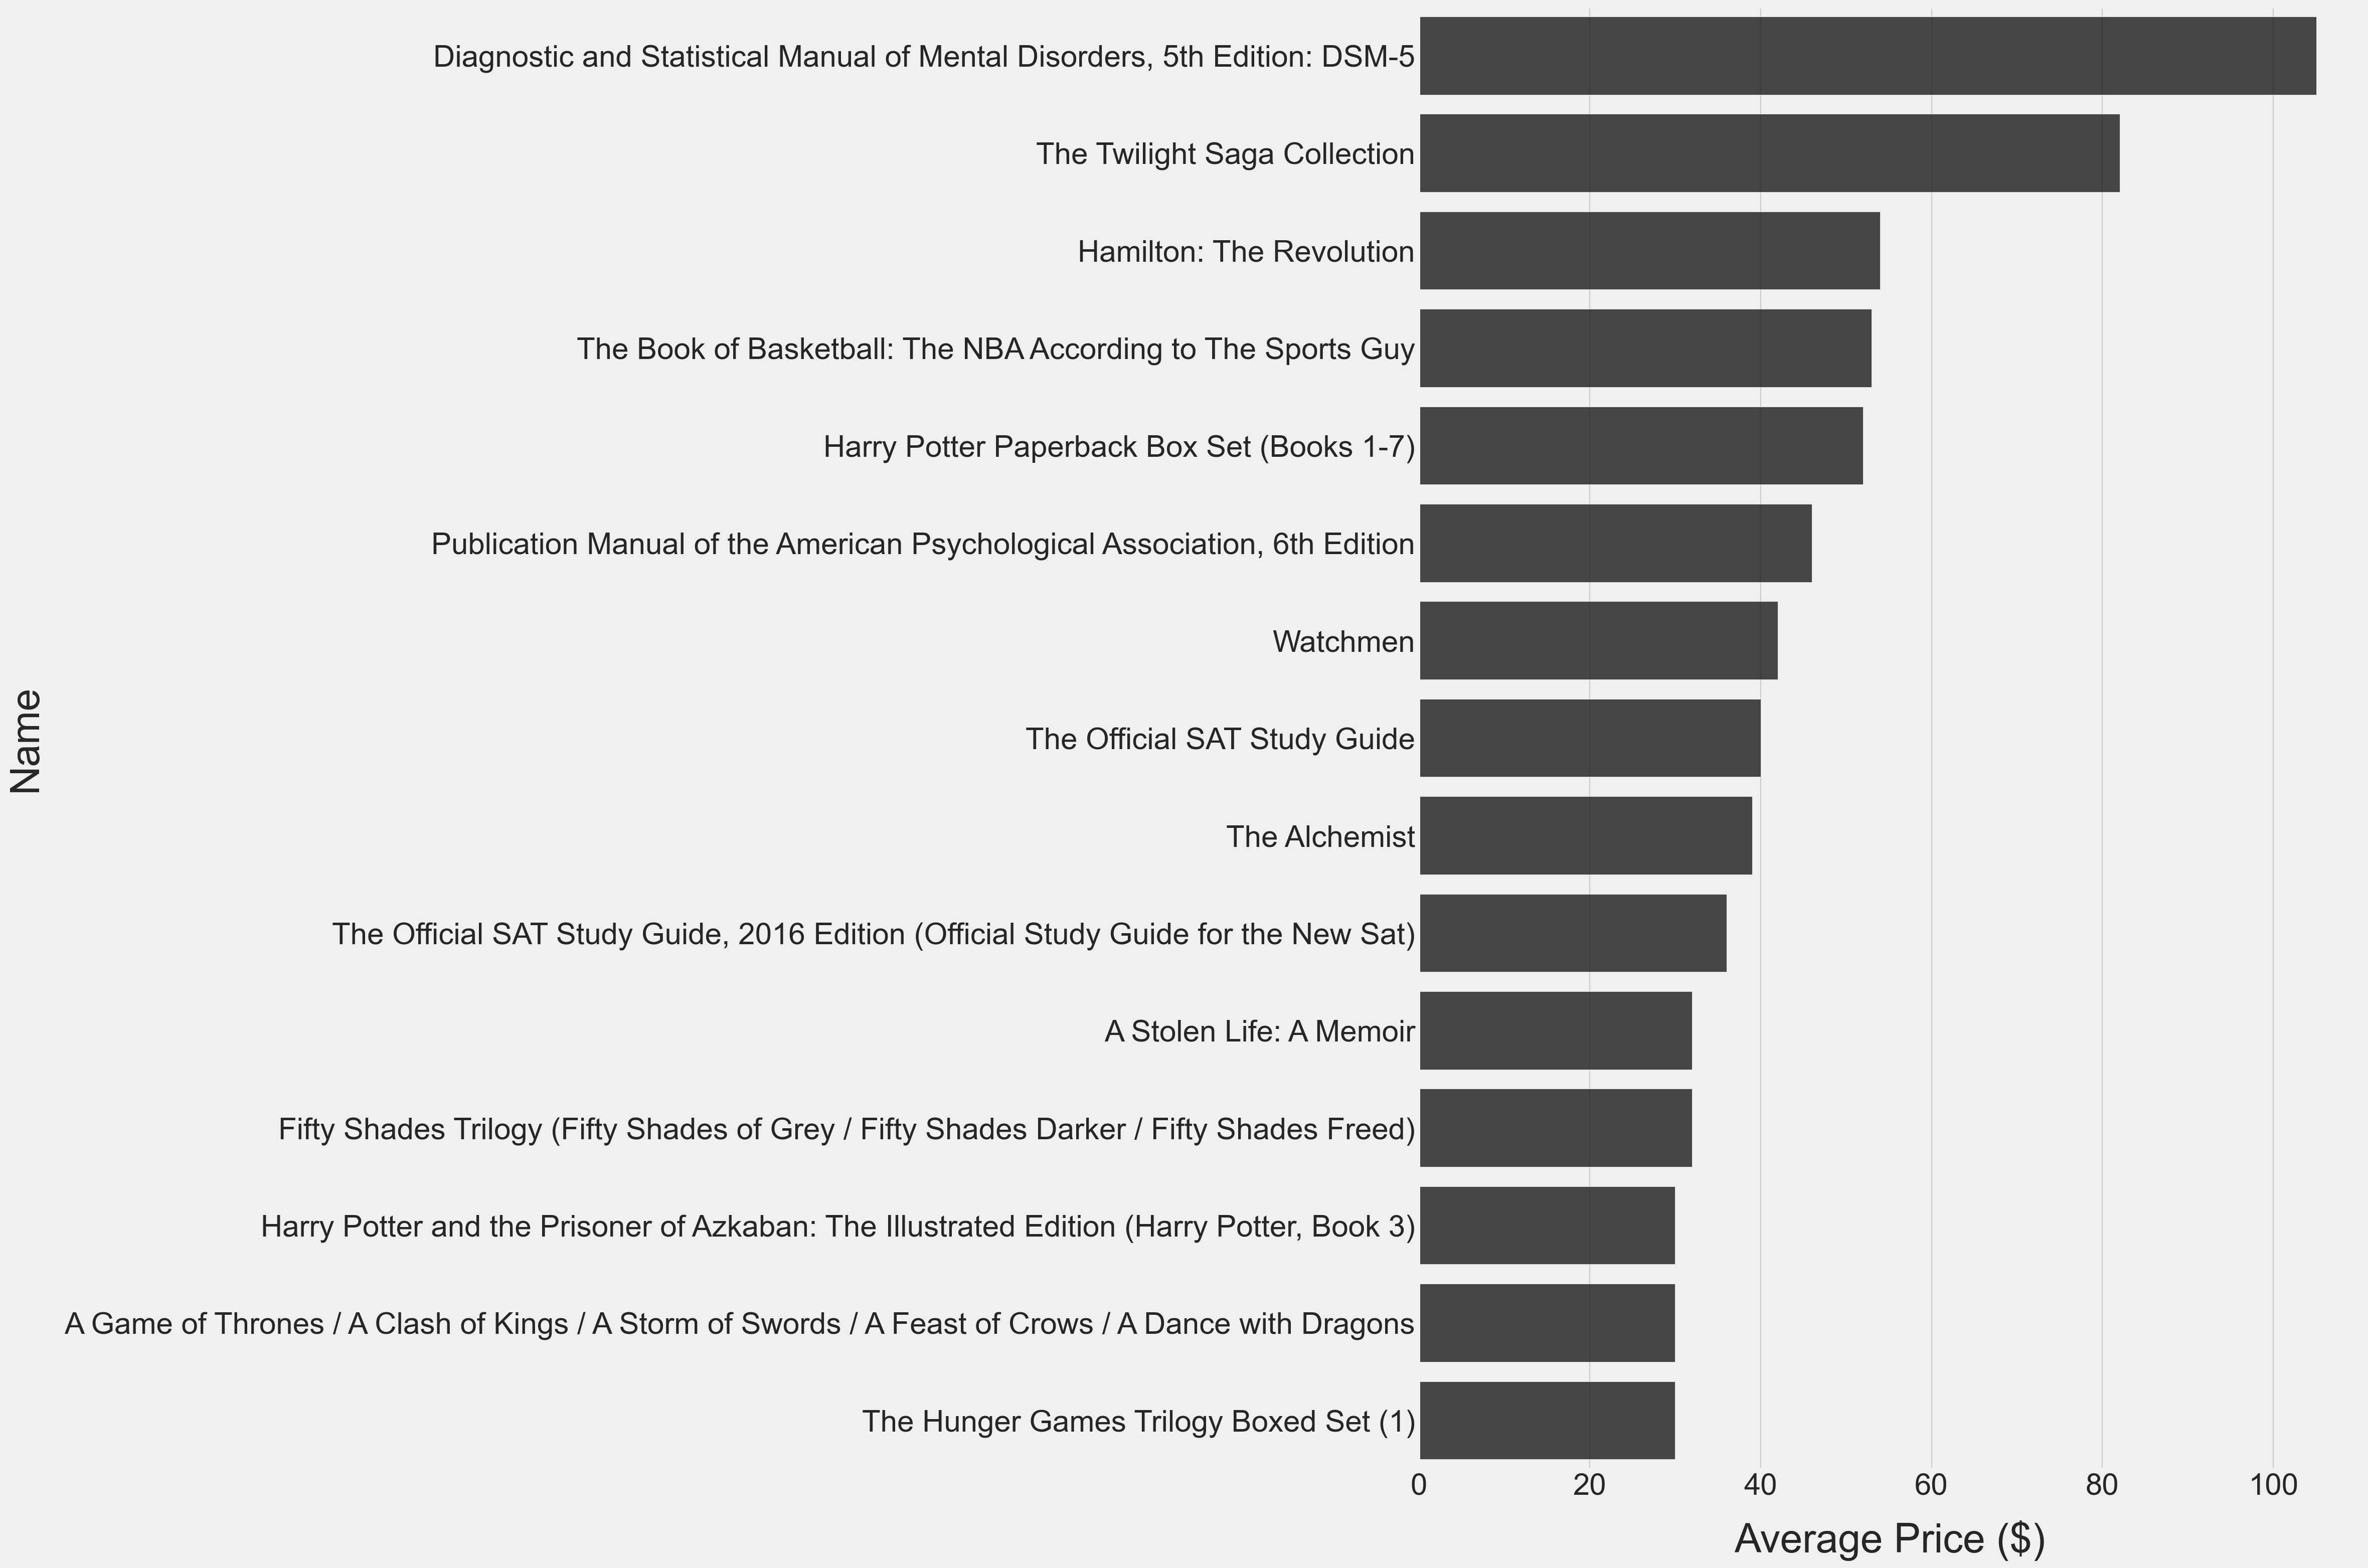

In [12]:
most_expensive_titles = amazon_books.groupby('Name', as_index=False)[['Price']].mean()\
                            .sort_values('Price', ascending=False).head(15)

fig, ax = plt.subplots(figsize=(15, 25))
sns.barplot(data=most_expensive_titles, y='Name', x='Price',
            alpha=0.8, color='k', ax=ax)
ax.set_ylabel('Name', fontsize=40, labelpad=20)
ax.set_xlabel('Average Price ($)', fontsize=40, labelpad=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

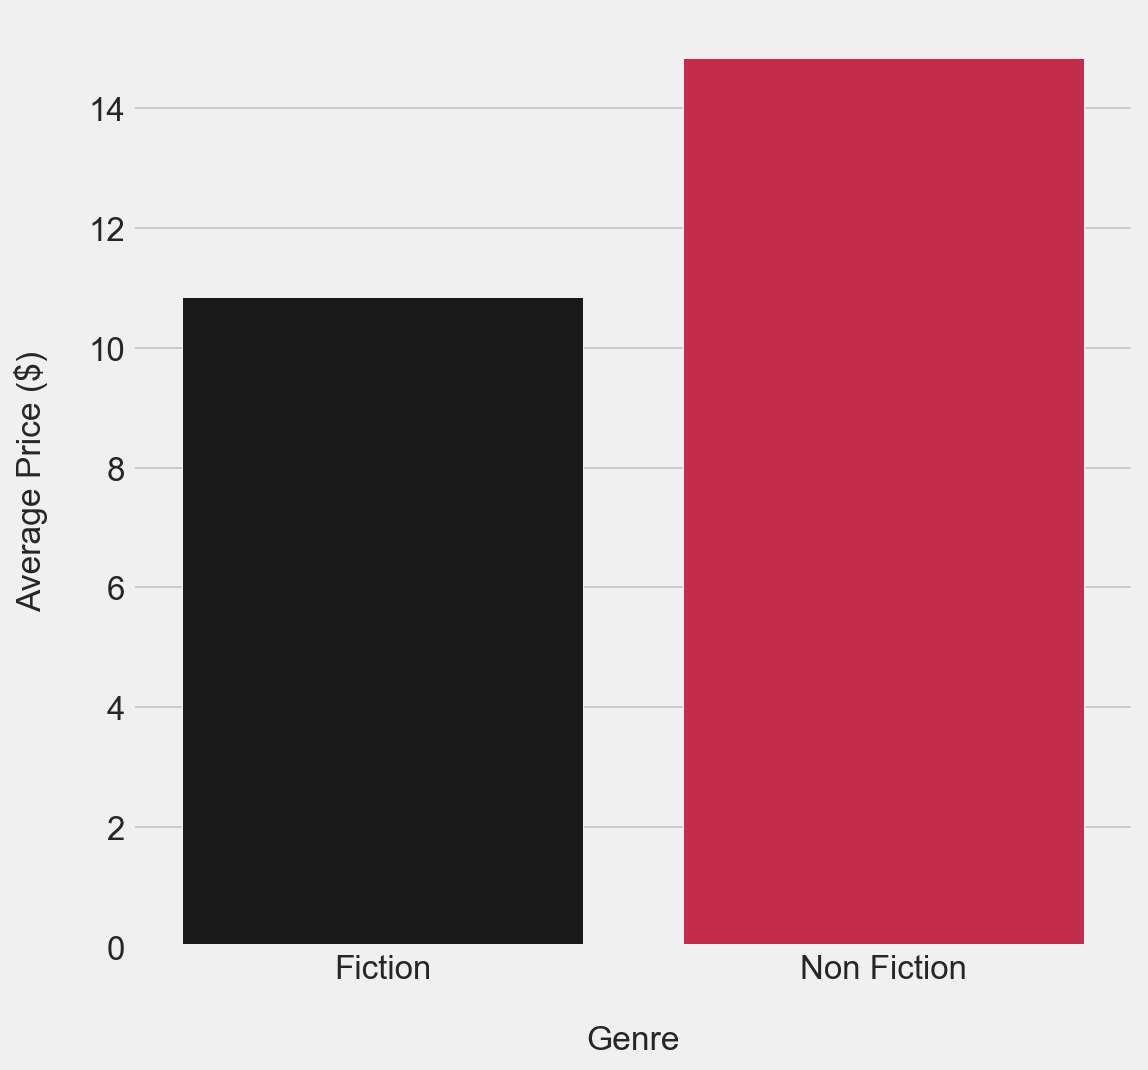

In [13]:
genre_mean_price = amazon_books.groupby('Genre', as_index=False)[['Price']].mean()

fig, ax = plt.subplots(figsize=(8, 8))
sns.barplot(data=genre_mean_price, x='Genre', y='Price', palette=['k', 'crimson'], ax=ax)
ax.set_ylabel('Average Price ($)', labelpad=20)
ax.set_xlabel('Genre', labelpad=20)
plt.show()